#### Step 1: Import all the libraries needed

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

#### Step 2: load the dataset for analysis

In [8]:
url = 'Desktop/CBT Nuggets - Python Programming/Machine Learning/Microsoft ML program/Data/real_estate.csv'

data = pd.read_csv(url)
data.head(30)

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [7]:
data.describe()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


#### Step 3: Visualize the dataset for discrepancies

In [9]:
# Get the column labels
label = data[data.columns[-1]]

<ipython-input-13-3bf8eca17311>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


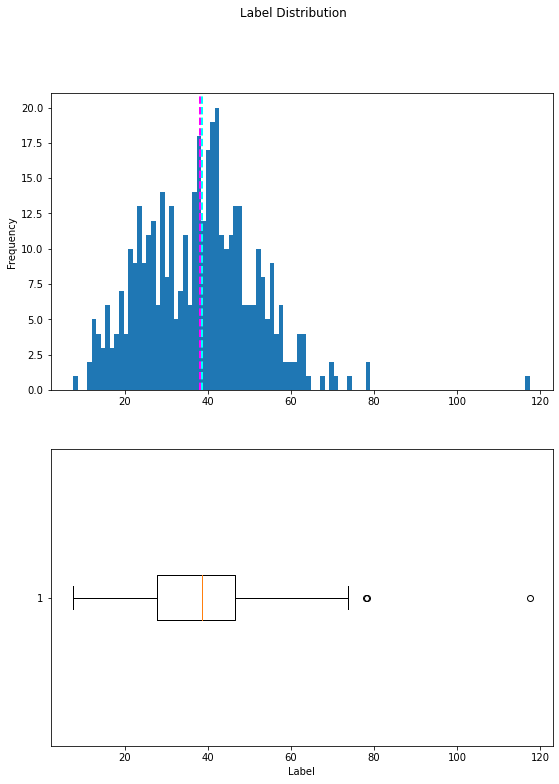

In [13]:
# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2,1, figsize = (9,12))

# Plot the histogram
ax[0].hist(label, bins = 100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
ax[0].axvline(label.median(), color = 'cyan', linestyle = 'dashed', linewidth = 2)

# Plot a Boxplot
ax[1].boxplot(label, vert = False)
ax[1].set_xlabel('Label')

# Add a title to the figure
fig.suptitle('Label Distribution')

# Show the figure
fig.show()

#### Remove outliers

In [14]:
data = data[data['house price of unit area']<70]

# Get the label column
label = data[data.columns[-1]]

<ipython-input-15-c59053deacea>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


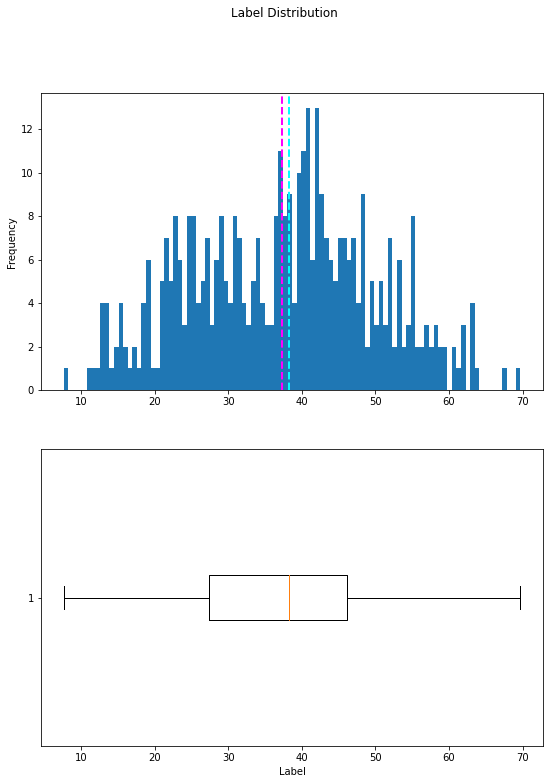

In [15]:
# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize=(9,12))

# Plot the histogram
ax[0].hist(label, bins = 100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color = 'magenta', linestyle = 'dashed', linewidth = 2)
ax[0].axvline(label.median(), color = 'cyan', linestyle = 'dashed', linewidth = 2)

# Plot a Boxplot
ax[1].boxplot(label, vert = False)
ax[1].set_xlabel('Label')

# Add a title to the figure
fig.suptitle('Label Distribution')

# Show the figure
fig.show()

### View numeric correlations


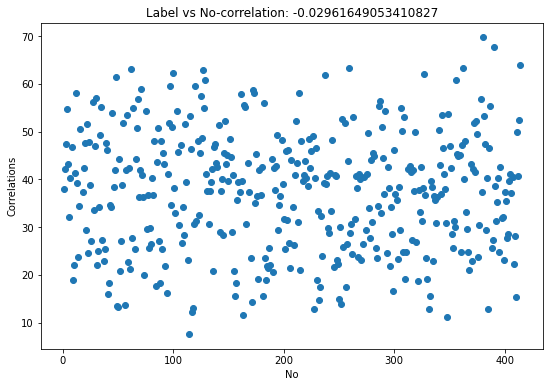

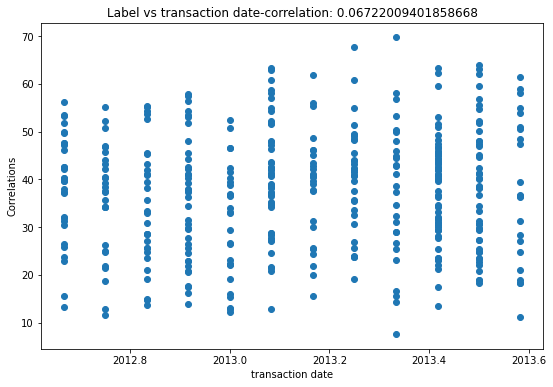

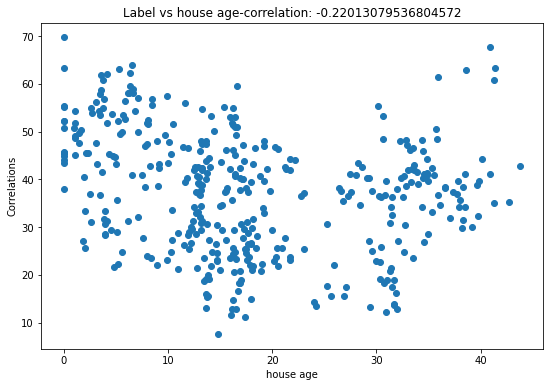

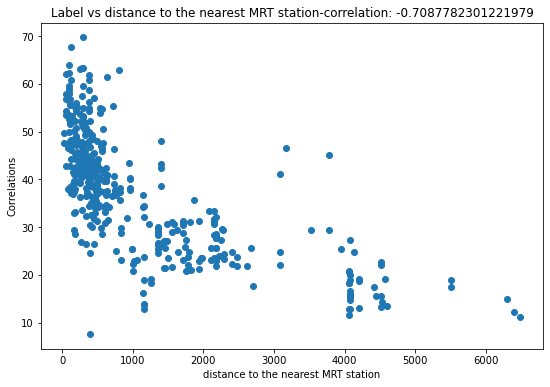

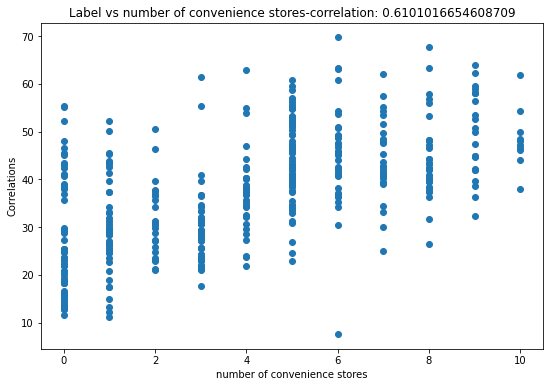

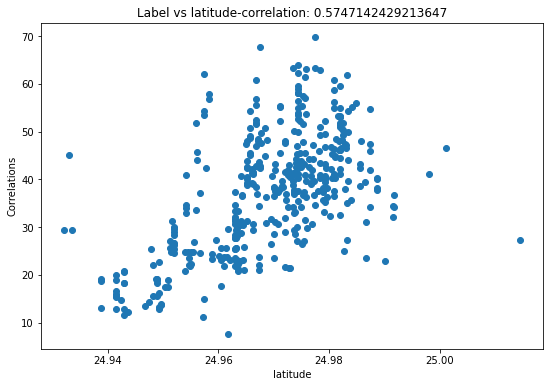

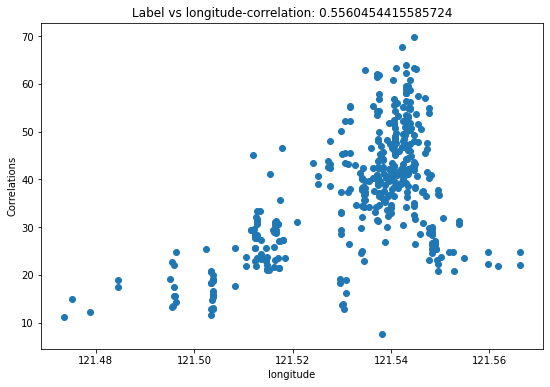

In [16]:
for col in data[data.columns[0:-1]]:
    fig = plt.figure(figsize = (9,6))
    ax = fig.gca()
    feature = data[col]
    correlation = feature.corr(label)
    plt.scatter(x = feature, y = label)
    plt.xlabel(col)
    plt.ylabel('Correlations')
    ax.set_title('Label vs ' + col + '-correlation: ' + str(correlation))
plt.show()

#### View Categorical features

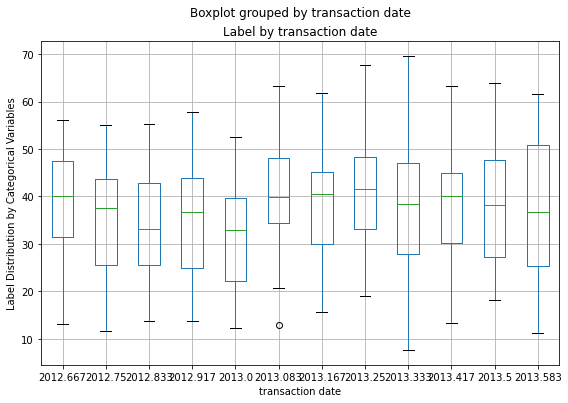

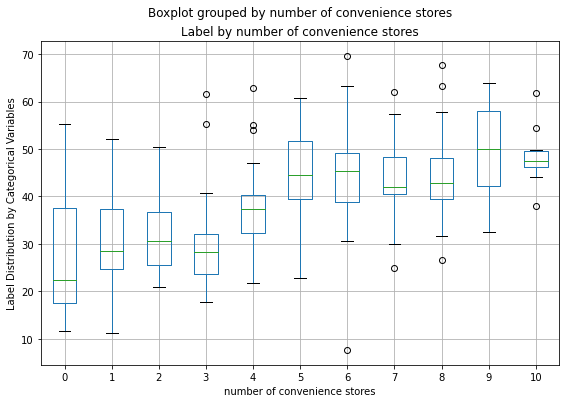

In [18]:
# Transaction date and number of convenience stores seems to discrete values, so might work better if treated as categorical features

# Plot a boxplot for the label by each categorical features
for col in data[['transaction date', 'number of convenience stores']]:
    fig = plt.figure(figsize =(9,6))
    ax = fig.gca()
    data.boxplot(column = 'house price of unit area', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel('Label Distribution by Categorical Variables')
plt.show()

#### Step 4: Separate features and label, and Split data for training and validation

In [23]:
# Separate features (columns 2 [house age] to the last one) and labels (the last column)
X, y = data[data.columns[2:-1]].values, data[data.columns[-1]].values

# Split data 70-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

print('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 285 rows
Test Set: 123 rows


### Step 5: Preprocess the data and train a model in the pipeline

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor

In [27]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [0,2,3,4]
numeric_transformer = Pipeline(steps = [('Scaler', StandardScaler())])

# combine preprocessing steps
preprocessor = ColumnTransformer(transformers = [('num', numeric_transformer, numeric_features)])

# create preprocessing and training pipeline
pipeline = Pipeline(steps = [('preprocessor', preprocessor), ('regressor', RandomForestRegressor())])

# Fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Scaler',
                                                                   StandardScaler())]),
                                                  [0, 2, 3, 4])])),
                ('regressor', RandomForestRegressor())])


### Step 6: Evaluate the model

MSE:  34.04112612783515
RMSE:  5.834477365440297
R2:  0.7095255331407491


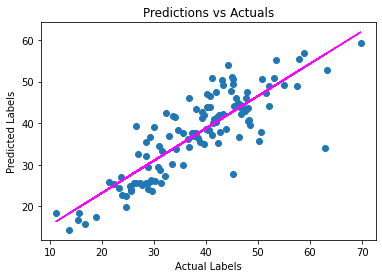

In [28]:
# Get Predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print('MSE: ', mse)
rmse = np.sqrt(mse)
print('RMSE: ', rmse)
r2 = r2_score(y_test, predictions)
print('R2: ', r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = 'magenta')
plt.show()

### Step 7: Use the Trained Model

In [29]:
import joblib

In [30]:
# Save the model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump(model, filename)

['./real_estate_model.pkl']

In [31]:
# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[16.2, 289.3248, 5, 24.98203, 121.54348],
                  [13.6, 4082.015, 0, 24.94155, 121.50381]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
49.26
16.59
